In [2]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error



In [4]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

            recovered
Date                 
2021-03-07      305.0
2021-03-07    10148.0
2021-03-07     5319.0
2021-03-07     1233.0
2021-03-07    16328.0


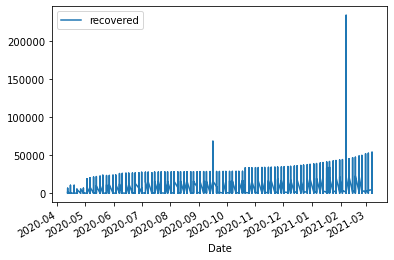

In [5]:
# load dataset
covid = read_csv('date_state.csv',
                       index_col ='Date',
                       parse_dates = True)
 

print(covid.head())
covid.plot()
pyplot.show()

In [6]:
# fit model
model = ARIMA(covid, order=(5,1,0))
model_fit = model.fit()

/Users/944allview/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/944allview/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/Users/944allview/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/944allview/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has 

In [7]:
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              recovered   No. Observations:                 5320
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -55067.188
Date:                Fri, 01 Apr 2022   AIC                         110146.376
Time:                        23:52:26   BIC                         110185.850
Sample:                             0   HQIC                        110160.168
                               - 5320                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8148      0.007   -124.881      0.000      -0.828      -0.802
ar.L2         -0.7459      0.008    -97.523      0.000      -0.761      -0.731
ar.L3         -0.5328      0.007    -76.355      0.0

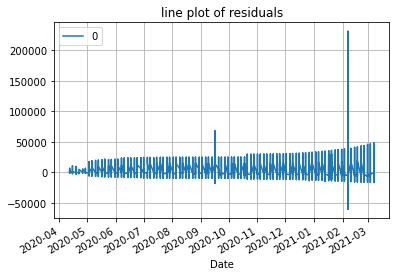

In [8]:
# line chart of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
# Create a title.
pyplot.title("line plot of residuals")
# Add a grid.
pyplot.grid()
pyplot.show()

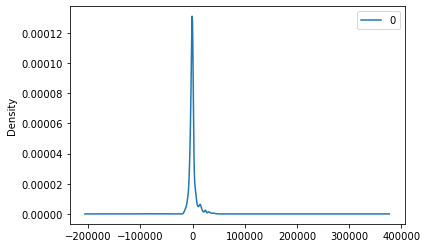

In [9]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

In [10]:
# summary stats of residuals
print(residuals.describe())

                   0
count    5310.000000
mean       -2.492258
std      7733.981726
min    -60660.916060
25%     -2878.444516
50%      -787.971536
75%       584.180277
max    231008.803013


In [11]:
# split into train and test sets
X = covid.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [12]:
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


predicted=5258.734750, expected=550.000000
predicted=9715.298294, expected=326.000000
predicted=6144.867549, expected=7209.000000
predicted=6222.712419, expected=230.000000
predicted=7629.116578, expected=1007.000000
predicted=2544.377652, expected=1777.000000
predicted=1922.382870, expected=135.000000
predicted=1456.530613, expected=1073.000000
predicted=2403.236230, expected=6837.000000
predicted=1907.881863, expected=311.000000
predicted=1255.750151, expected=2218.000000
predicted=2388.054035, expected=8.000000
predicted=1632.054686, expected=57.000000
predicted=1682.930362, expected=1592.000000
predicted=2297.093519, expected=955.000000
predicted=683.203200, expected=117.000000
predicted=914.300865, expected=27.000000
predicted=496.100867, expected=22.000000
predicted=432.937371, expected=1538.000000
predicted=810.635344, expected=434.000000
predicted=434.061283, expected=534.000000
predicted=465.957804, expected=3454.000000
predicted=1062.680262, expected=8715.000000
predicted=229

predicted=2142.958914, expected=1615.000000
predicted=1948.604479, expected=4396.000000
predicted=3258.780166, expected=578.000000
predicted=2792.388983, expected=523.000000
predicted=2973.139779, expected=5091.000000
predicted=3854.367343, expected=3173.000000
predicted=2133.905642, expected=5.000000
predicted=2393.981116, expected=24.000000
predicted=1755.039089, expected=793.000000
predicted=1541.535140, expected=119.000000
predicted=1662.277418, expected=7488.000000
predicted=2295.145529, expected=2822.000000
predicted=1236.878262, expected=299.000000
predicted=1872.300038, expected=670.000000
predicted=2255.013461, expected=3543.000000
predicted=2338.447801, expected=8431.000000
predicted=4097.365031, expected=3377.000000
predicted=2732.493078, expected=114.000000
predicted=2727.410519, expected=6366.000000
predicted=4038.839673, expected=1581.000000
predicted=3336.443700, expected=1129.000000
predicted=3960.314612, expected=2.000000
predicted=2319.615713, expected=1355.000000
pre

predicted=1589.782747, expected=23.000000
predicted=1880.701171, expected=1441.000000
predicted=992.872308, expected=78.000000
predicted=570.102381, expected=282.000000
predicted=514.172436, expected=386.000000
predicted=637.852038, expected=15423.000000
predicted=3199.184262, expected=527.000000
predicted=1646.555226, expected=553.000000
predicted=3358.521692, expected=27867.000000
predicted=8295.476871, expected=2991.000000
predicted=4918.554640, expected=407.000000
predicted=9515.941023, expected=224.000000
predicted=5936.285539, expected=6812.000000
predicted=5850.075156, expected=159.000000
predicted=7236.325683, expected=971.000000
predicted=2325.859430, expected=884.000000
predicted=1628.693835, expected=98.000000
predicted=1282.974878, expected=685.000000
predicted=2024.521929, expected=2813.000000
predicted=924.849786, expected=201.000000
predicted=727.393573, expected=1905.000000
predicted=1272.849348, expected=6.000000
predicted=803.274975, expected=56.000000
predicted=966.5

predicted=1117.042836, expected=777.000000
predicted=521.367683, expected=93.000000
predicted=731.288956, expected=20.000000
predicted=417.435894, expected=12.000000
predicted=354.999339, expected=891.000000
predicted=582.670871, expected=240.000000
predicted=296.992196, expected=nan
predicted=279.462811, expected=1463.000000
predicted=527.630096, expected=5632.000000
predicted=1498.129013, expected=1667.000000
predicted=1394.818621, expected=4287.000000
predicted=2572.806455, expected=541.000000
predicted=2216.586858, expected=505.000000
predicted=2398.224816, expected=3281.000000
predicted=3010.903779, expected=2698.000000
predicted=1885.481276, expected=5.000000
predicted=1968.425670, expected=17.000000
predicted=1341.940513, expected=693.000000
predicted=1182.375974, expected=90.000000
predicted=1158.292377, expected=6770.000000
predicted=2012.892148, expected=2386.000000
predicted=1068.460221, expected=261.000000
predicted=1710.277494, expected=538.000000
predicted=2009.333689, ex

predicted=1932.004538, expected=7624.000000
predicted=3462.478106, expected=2939.000000
predicted=2313.317701, expected=100.000000
predicted=2468.131379, expected=6016.000000
predicted=3654.912011, expected=1298.000000
predicted=2912.026316, expected=879.000000
predicted=3576.597755, expected=2.000000
predicted=2090.772753, expected=891.000000
predicted=1422.719221, expected=0.000000
predicted=1714.049202, expected=1109.000000
predicted=793.675434, expected=74.000000
predicted=446.977688, expected=216.000000
predicted=395.075131, expected=320.000000
predicted=488.581650, expected=12625.000000
predicted=2588.128525, expected=435.000000
predicted=1316.201346, expected=464.000000
predicted=2822.801677, expected=26442.000000
predicted=7465.611473, expected=2557.000000
predicted=4264.682774, expected=359.000000
predicted=8623.341073, expected=176.000000
predicted=5606.716540, expected=6215.000000
predicted=5398.918291, expected=147.000000
predicted=6682.511139, expected=833.000000
predicted

predicted=1333.239049, expected=62.000000
predicted=1036.402892, expected=388.000000
predicted=1583.721356, expected=1734.000000
predicted=588.578812, expected=117.000000
predicted=464.478129, expected=1428.000000
predicted=827.993899, expected=6.000000
predicted=510.323654, expected=55.000000
predicted=647.985917, expected=1135.000000
predicted=871.378937, expected=616.000000
predicted=423.478124, expected=78.000000
predicted=614.091384, expected=17.000000
predicted=355.538195, expected=10.000000
predicted=298.012408, expected=632.000000
predicted=465.054548, expected=133.000000
predicted=217.533770, expected=435.000000
predicted=243.089705, expected=906.000000
predicted=348.276940, expected=4213.000000
predicted=1049.616701, expected=1445.000000
predicted=984.330799, expected=3944.000000
predicted=1968.163498, expected=466.000000
predicted=1655.669131, expected=366.000000
predicted=1954.283175, expected=2451.000000
predicted=2414.393742, expected=2053.000000
predicted=1558.480039, ex

predicted=878.129315, expected=395.000000
predicted=738.561926, expected=77.000000
predicted=725.239466, expected=4525.000000
predicted=1298.111321, expected=1716.000000
predicted=723.302983, expected=178.000000
predicted=1174.267219, expected=376.000000
predicted=1376.808620, expected=2608.000000
predicted=1490.857856, expected=6066.000000
predicted=2623.301298, expected=2123.000000
predicted=1823.631235, expected=73.000000
predicted=2007.833924, expected=5060.000000
predicted=2947.483459, expected=777.000000
predicted=2278.660344, expected=616.000000
predicted=2837.022064, expected=2.000000
predicted=1610.481957, expected=570.000000
predicted=1075.924653, expected=16.000000
predicted=1349.967597, expected=702.000000
predicted=501.846491, expected=49.000000
predicted=299.233922, expected=138.000000
predicted=256.770567, expected=190.000000
predicted=309.974797, expected=10747.000000
predicted=2145.793164, expected=283.000000
predicted=1016.043875, expected=378.000000
predicted=2415.17

predicted=3097.512952, expected=272.000000
predicted=6771.466285, expected=109.000000
predicted=4394.385916, expected=3707.000000
predicted=3952.140379, expected=111.000000
predicted=5125.194021, expected=422.000000
predicted=1216.229112, expected=331.000000
predicted=875.053533, expected=34.000000
predicted=660.016418, expected=243.000000
predicted=1003.142836, expected=1088.000000
predicted=367.384409, expected=67.000000
predicted=279.742222, expected=839.000000
predicted=511.520524, expected=4.000000
predicted=314.562337, expected=53.000000
predicted=398.597527, expected=931.000000
predicted=574.341736, expected=400.000000
predicted=277.053221, expected=50.000000
predicted=424.120600, expected=7.000000
predicted=270.500406, expected=3.000000
predicted=222.185649, expected=343.000000
predicted=327.191542, expected=82.000000
predicted=132.915864, expected=3.000000
predicted=91.199639, expected=426.000000
predicted=162.156079, expected=2325.000000
predicted=522.727413, expected=921.000

predicted=638.108020, expected=120.000000
predicted=769.208612, expected=53.000000
predicted=785.080994, expected=916.000000
predicted=583.993309, expected=3.000000
predicted=450.159841, expected=456.000000
predicted=343.601469, expected=434.000000
predicted=315.195637, expected=64.000000
predicted=273.584243, expected=1933.000000
predicted=735.084814, expected=813.000000
predicted=439.580917, expected=118.000000
predicted=656.770801, expected=207.000000
predicted=679.717873, expected=1473.000000
predicted=736.124015, expected=2899.000000
predicted=1225.230278, expected=827.000000
predicted=893.819023, expected=34.000000
predicted=1007.091239, expected=3329.000000
predicted=1575.099070, expected=273.000000
predicted=1143.392610, expected=274.000000
predicted=1513.763495, expected=53.000000
predicted=886.004159, expected=227.000000
predicted=608.704853, expected=535.000000
predicted=923.060013, expected=299.000000
predicted=245.310439, expected=664.000000
predicted=365.129670, expected=

predicted=126.167878, expected=24.000000
predicted=117.460901, expected=10578.000000
predicted=2104.013476, expected=361.000000
predicted=915.105576, expected=34.000000
predicted=2406.445664, expected=43.000000
predicted=2123.609765, expected=54.000000
predicted=1512.045288, expected=3.000000
predicted=2322.236748, expected=42.000000
predicted=108.936401, expected=32.000000
predicted=32.494702, expected=91.000000
predicted=44.969859, expected=562.000000
predicted=136.873475, expected=32.000000
predicted=76.233164, expected=22.000000
predicted=156.173817, expected=54.000000
predicted=141.689631, expected=322.000000
predicted=168.777051, expected=3.000000
predicted=162.329777, expected=567.000000
predicted=193.629170, expected=182.000000
predicted=145.097406, expected=32.000000
predicted=194.552566, expected=42.000000
predicted=223.016731, expected=54.000000
predicted=130.217112, expected=342.000000
predicted=227.151653, expected=234.000000
predicted=129.255415, expected=442.000000
predi

NameError: name 'sqrt' is not defined

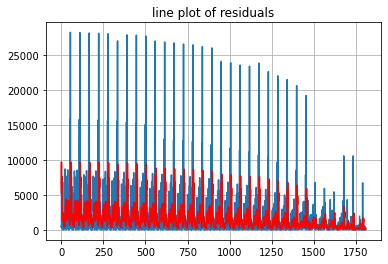

In [18]:
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
# Add a grid.
pyplot.grid()
pyplot.title("line plot of residuals")
pyplot.show()